In [16]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [17]:
def make_featrues(x):
    x = x.unsqueeze(1)
    return torch.cat([x**i for i in range(1,4)],1)


w_target = torch.FloatTensor([0.5,3,2.4]).unsqueeze(1)
b_target = torch.FloatTensor([.9])

def f(x):
    return x.mm(w_target) + b_target[0]

def get_batch(batch_size=32):
    random = torch.randn(batch_size).sort()[0]#sort return 的是个（batch_size,2）的张量，第二个量记录的是原来顺序
    
    x = make_featrues(random)
    y=f(x)
    if torch.cuda.is_available():
        return random.data.numpy(), Variable(x).cuda(), Variable(y).cuda()
    else:
        return random.data.numpy(), Variable(x),Variable(y)

class PR (nn.Module):
    def __init__(self):
        super(PR,self).__init__()
        self.poly = nn.Linear(in_features= 3,out_features = 1,bias = True)
    def forward(self, x):
        out = self.poly(x)
        return out


In [18]:
def train():
    num_epochs = 3000
    MODEL_SAVE_PATH='./'
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(),lr=1e-3)
    for epoch in range(num_epochs):
        try:
            if torch.cuda.is_available():
                inputs = Variable(x_train_cuda)
                target = Variable(y_train_cuda)
            else:
                inputs =Variable(x_train)
                target = Variable(y_train)
            #forward
            out = model(inputs)
            loss = criterion(out, target)
            #backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (epoch+1)%50==0:
                print('Epoch[{}/{}], loss:{:.6f}'.format(epoch+1,num_epochs, loss.item()))
        
        except KeyboardInterrupt:
            print('you have a incomming call')
            break
            #torch.save(model, MODEL_SAVE_PATH)
    #torch.save(model, MODEL_SAVE_PATH)


Epoch[50/3000], loss:14.837116
Epoch[100/3000], loss:10.628674
Epoch[150/3000], loss:7.846461
Epoch[200/3000], loss:5.860492
Epoch[250/3000], loss:4.437113
Epoch[300/3000], loss:3.412313
Epoch[350/3000], loss:2.670250
Epoch[400/3000], loss:2.129060
Epoch[450/3000], loss:1.730883
Epoch[500/3000], loss:1.434788
Epoch[550/3000], loss:1.211807
Epoch[600/3000], loss:1.041415
Epoch[650/3000], loss:0.909054
Epoch[700/3000], loss:0.804381
Epoch[750/3000], loss:0.720031
Epoch[800/3000], loss:0.650751
Epoch[850/3000], loss:0.592778
Epoch[900/3000], loss:0.543408
Epoch[950/3000], loss:0.500682
Epoch[1000/3000], loss:0.463181
Epoch[1050/3000], loss:0.429861
Epoch[1100/3000], loss:0.399950
Epoch[1150/3000], loss:0.372871
Epoch[1200/3000], loss:0.348184
Epoch[1250/3000], loss:0.325552
Epoch[1300/3000], loss:0.304711
Epoch[1350/3000], loss:0.285450
Epoch[1400/3000], loss:0.267599
Epoch[1450/3000], loss:0.251015
Epoch[1500/3000], loss:0.235582
Epoch[1550/3000], loss:0.221196
Epoch[1600/3000], loss:0.2

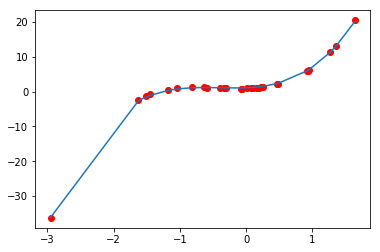

In [67]:

if __name__=='__main__':

    if torch.cuda.is_available():
        model = PR().cuda()
    else: 
        model = PR()
    #data generate
    x_np,x_train_cuda,y_train_cuda = get_batch()
    x_train_np,y_train_np = x_train_cuda.cpu().data.numpy(),y_train_cuda.cpu().data.numpy()
    
    train()
    
    model.eval()

    predict = model(Variable(x_train_cuda))
    predict = predict.cpu().data.numpy()
    predict=predict.reshape(32)
    #print(predict)
    #print(y_train_np)
    #torch.save(model, '.\data')
    torch.save(model.state_dict(), '.\state_dict.txt')
    torch.save(model, '.\model.txt')
    for param in model.parameters():
        print(type(param.data), param.data,param.size())
    plt.plot(x_np,y_train_np,'ro',label = 'original data')
    plt.plot(x_np,predict,label = 'Fitting Line')
    plt.show()

In [68]:
model2=PR().cuda()
state_dict=torch.load('.\state_dict.txt')
model2.load_state_dict(state_dict)


print(type(model2))
print(type(state_dict))



<class '__main__.PR'>
<class 'collections.OrderedDict'>


In [70]:
model3 = torch.load('.\model.txt')
print(model3)


PR(
  (poly): Linear(in_features=3, out_features=1, bias=True)
)


<class 'torch.Tensor'> tensor([[0.7359, 2.8028, 2.3083]], device='cuda:0') torch.Size([1, 3])
<class 'torch.Tensor'> tensor([1.0877], device='cuda:0') torch.Size([1])


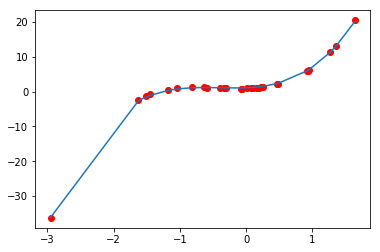

In [71]:

predict = model2(Variable(x_train_cuda))
predict = predict.cpu().data.numpy()
predict=predict.reshape(32)
#print(predict)
#print(y_train_np)
#torch.save(model, '.\data')
#torch.save(model.state_dict(), '.\data.pth')
for param in model2.parameters():
    print(type(param.data), param.data,param.size())
plt.plot(x_np,y_train_np,'ro',label = 'original data')
plt.plot(x_np,predict,label = 'Fitting Line')
plt.show()

<class 'torch.Tensor'> tensor([[0.7359, 2.8028, 2.3083]], device='cuda:0') torch.Size([1, 3])
<class 'torch.Tensor'> tensor([1.0877], device='cuda:0') torch.Size([1])


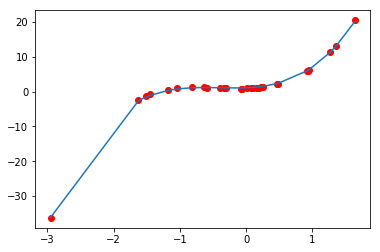

In [72]:
predict = model3(Variable(x_train_cuda))
predict = predict.cpu().data.numpy()
predict=predict.reshape(32)
#print(predict)
#print(y_train_np)
#torch.save(model, '.\data')
#torch.save(model.state_dict(), '.\data.pth')
for param in model3.parameters():
    print(type(param.data), param.data,param.size())
plt.plot(x_np,y_train_np,'ro',label = 'original data')
plt.plot(x_np,predict,label = 'Fitting Line')
plt.show()

In [59]:
model3 = torch.load('.\model.pkl')
print(model3)

OrderedDict([('poly.weight', tensor([[0.5763, 2.9904, 2.3824]], device='cuda:0')), ('poly.bias', tensor([0.9105], device='cuda:0'))])
